# Exoplanet Detection

In [ ]:
import lightkurve as lk
from lightkurve import search_targetpixelfile
import matplotlib
%matplotlib inline

### Catalogue of Detections

In [ ]:
file = search_targetpixelfile("TIC 192790476", author = "SPOC", exptime = 120)
file

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 05,2018,SPOC,120,192790476,0.0
1,TESS Sector 06,2018,SPOC,120,192790476,0.0
2,TESS Sector 32,2020,SPOC,120,192790476,0.0
3,TESS Sector 33,2020,SPOC,120,192790476,0.0


 ### Animation

In [ ]:
# pixelfile = lk.search_targetpixelfile("TIC 192790476", author = "SPOC", exptime = 120)[1].download()

I have downloaded the first detection from the catalogue and I have animated it below to show how the brightness varies frame by frame, though this is not the main purpose of the Tess telescope.

In [ ]:
# pixelfile.animate()

In [ ]:
pixelfile = lk.search_lightcurve("TIC 192790476", author = "SPOC", exptime = 120).download_all() 
pixelfile

LightCurveCollection of 4 objects:
    0: <TessLightCurve LABEL="TIC 192790476" SECTOR=5 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 192790476" SECTOR=6 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 192790476" SECTOR=32 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    3: <TessLightCurve LABEL="TIC 192790476" SECTOR=33 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

I have used the "search_lightcurve" function which find the lightcurve of a given file.
Alternatively, we can also use the to_lightcurve method which converts a tpf file to lightcurve file. I did not use this method as there was no direct function like stitch available to combine all the given files into one.

### All Sector Data Plot

The Data from all the sectors is combined using the stitch function and is plotted

In [ ]:
pixelfile_stitch = pixelfile.stitch()

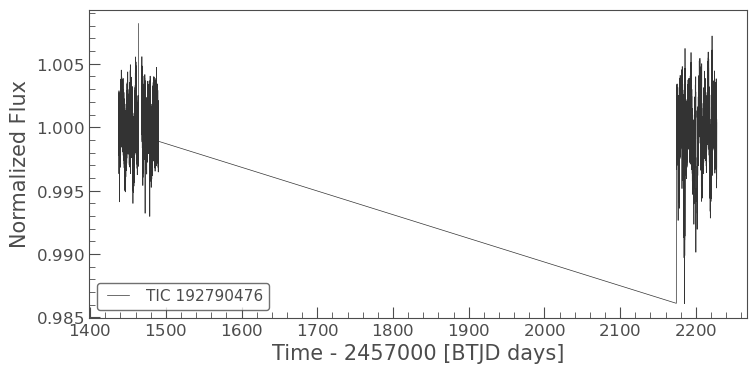

In [ ]:
pixelfile_stitch.plot();

### Normalization

The data from the file seems to be already but still I have normalised here explicitly

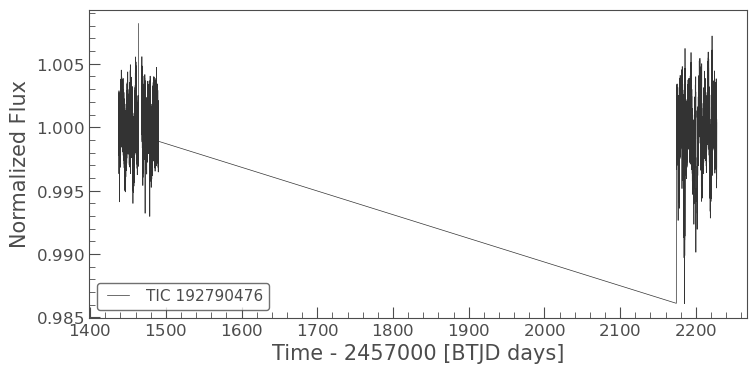

In [ ]:
pixelfile_stitch.normalize().plot();

### Detrending

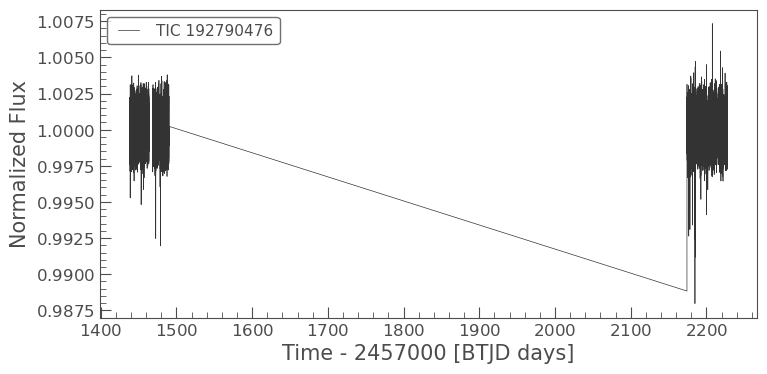

In [ ]:
pixelfile_detrend = pixelfile_stitch.flatten()
pixelfile_detrend.plot();

### Folding

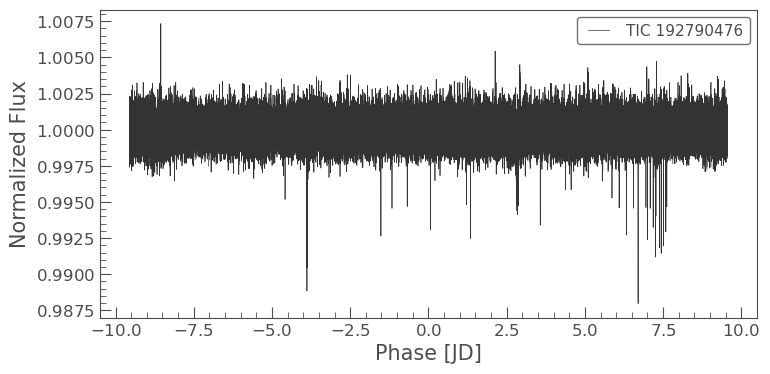

In [ ]:
time_period = 19.104718
epoch_time = 1452.334203609
transit_duration = 0.2
pixelfile_fold = pixelfile_detrend.fold(time_period, epoch_time, transit_duration)
pixelfile_fold.plot();

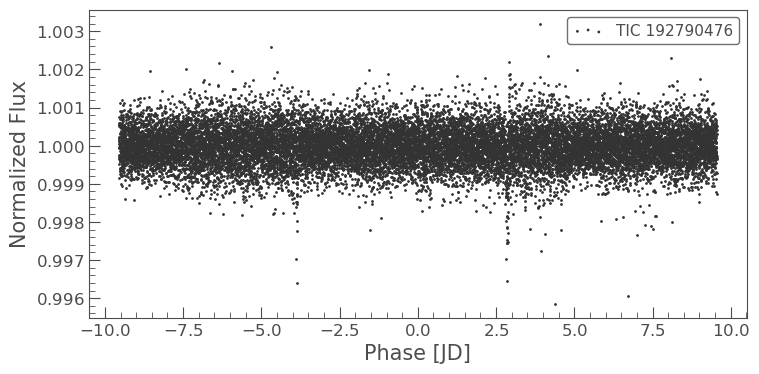

In [41]:
pixelfile_fold.bin(0.001).scatter();

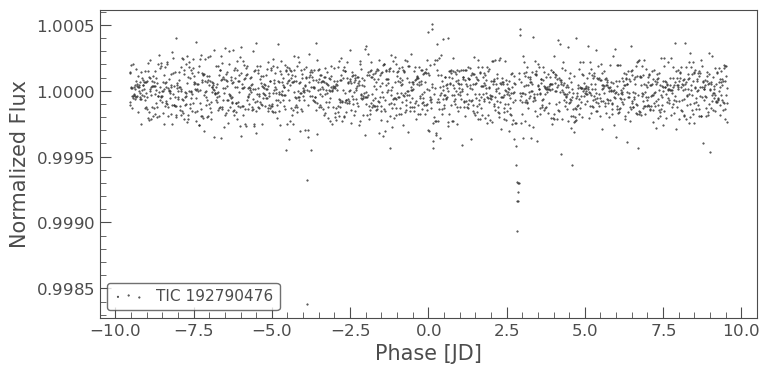

In [40]:
pixelfile_fold.bin(0.01).scatter(s =1);